In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import os
import matplotlib.pyplot as plt
import shutil
from sklearn.model_selection import train_test_split

In [ ]:
BASE_DIR = '/content/dataset'
CLASS_NAMES = ['AiArtData', 'RealArt']

NEW_TRAIN_DIR = os.path.join(BASE_DIR, 'train')
NEW_TEST_DIR = os.path.join(BASE_DIR, 'test')

In [ ]:
all_files = []
all_labels = []

for i, class_name in enumerate(CLASS_NAMES):
  class_path = os.path.join(BASE_DIR, class_name)

  files = [os.path.join(class_path, f) for f in os.listdir(class_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

  all_files.extend(files)
  all_labels.extend([i] * len(files))

In [ ]:
train_files, test_files, train_labels, test_labels = train_test_split(
    all_files, all_labels,
    test_size=0.2,
    random_state=42,
    stratify=all_labels
)


In [ ]:
def create_and_move(file_list, target_dir):
  for file_path in file_list:
    class_name = os.path.basename(os.path.dirname(file_path))
    final_target_dir = os.path.join(target_dir, class_name)
    os.makedirs(final_target_dir, exist_ok=True)
    shutil.move(file_path, final_target_dir)

shutil.rmtree(NEW_TRAIN_DIR, ignore_errors=True)
shutil.rmtree(NEW_TEST_DIR, ignore_errors=True)

create_and_move(train_files, NEW_TRAIN_DIR)
create_and_move(test_files, NEW_TEST_DIR)

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

test_datagen = ImageDataGenerator(rescale=1./255)

BASE_DIR = '/content/dataset'

train_generator = train_datagen.flow_from_directory(
    os.path.join(BASE_DIR, 'train'),
    target_size=(150, 150),
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    os.path.join(BASE_DIR, 'train'),
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

test_generator = test_datagen.flow_from_directory(
    os.path.join(BASE_DIR, 'test'),
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

Found 622 images belonging to 2 classes.
Found 154 images belonging to 2 classes.
Found 194 images belonging to 2 classes.


In [ ]:
model = Sequential([
    Conv2D(32, (3, 3),
           activation='relu',
           input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3),
           activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3),
           activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3),
           activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),

    Dropout(0.5),

    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from sklearn.utils import validation
epochs = 20

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

model.save('ai_vs_real_cnn_model.h5')

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
10/19 ━━━━━━━━━━━━━━━━━━━━ 28s 3s/step - accuracy: 0.5307 - loss: 0.7008

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


19/19 ━━━━━━━━━━━━━━━━━━━━ 61s 3s/step - accuracy: 0.5319 - loss: 0.6981 - val_accuracy: 0.6094 - val_loss: 0.6660
Epoch 2/20
 1/19 ━━━━━━━━━━━━━━━━━━━━ 50s 3s/step - accuracy: 0.6250 - loss: 0.6702

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


19/19 ━━━━━━━━━━━━━━━━━━━━ 12s 498ms/step - accuracy: 0.6250 - loss: 0.6702 - val_accuracy: 0.6406 - val_loss: 0.6697
Epoch 3/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 66s 3s/step - accuracy: 0.6114 - loss: 0.6654 - val_accuracy: 0.5312 - val_loss: 0.6799
Epoch 4/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 252ms/step - accuracy: 0.5625 - loss: 0.6816 - val_accuracy: 0.6094 - val_loss: 0.6734
Epoch 5/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 66s 2s/step - accuracy: 0.6042 - loss: 0.6604 - val_accuracy: 0.7109 - val_loss: 0.6536
Epoch 6/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 304ms/step - accuracy: 0.7188 - loss: 0.6217 - val_accuracy: 0.6172 - val_loss: 0.6434
Epoch 7/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.5822 - loss: 0.6611 - val_accuracy: 0.5781 - val_loss: 0.6635
Epoch 8/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 10s 496ms/step - accuracy: 0.5938 - loss: 0.6089 - val_accuracy: 0.5938 - val_loss: 0.6468
Epoch 9/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 83s 3s/step - accuracy: 0.5978 - loss: 0.6578 - val_accuracy: 0.6016 - val_loss: 

In [ ]:
print("Performing evaluation on test set...")

loss_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {loss_accuracy[0]}")
print(f"Test Accuracy: {loss_accuracy[1]}")

Performing evaluation on test set...


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.7501 - loss: 0.5608
Test Loss: 0.752752423286438
Test Accuracy: 0.6288659572601318


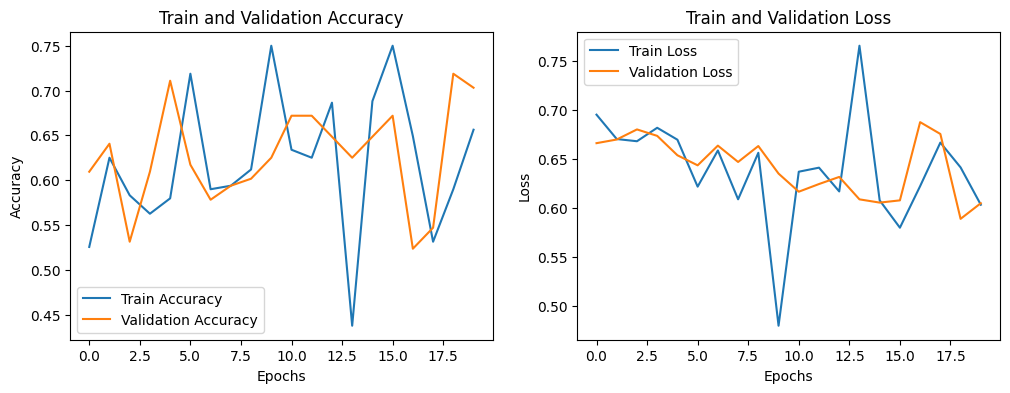

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plt.subplot(1, 2 ,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Train and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Train and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

7/7 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step


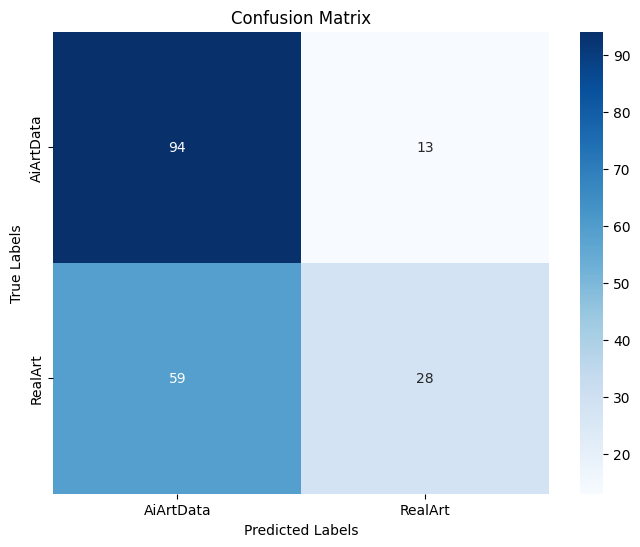

Detailed Classification Report: 
              precision    recall  f1-score   support

   AiArtData       0.61      0.88      0.72       107
     RealArt       0.68      0.32      0.44        87

    accuracy                           0.63       194
   macro avg       0.65      0.60      0.58       194
weighted avg       0.65      0.63      0.60       194



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import pandas as pd
import seaborn as sns

test_predictions = model.predict(test_generator)
test_predictions_classes = (test_predictions > 0.5).astype(int).flatten()

true_labels = test_generator.classes

class_labels = list(test_generator.class_indices.keys())

cm = confusion_matrix(true_labels, test_predictions_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

print("Detailed Classification Report: ")
print(classification_report(true_labels, test_predictions_classes, target_names=class_labels))